# Model Evaluation

In [19]:
import pandas as pd
import numpy as np
from e2ml.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
# Get Data
initial_molluscs_data = pd.read_csv('../../data/initial_molluscs_data.csv')
batch_1 = pd.read_csv('../../data/batch1_albayrak_labels.csv')
batch_2 = pd.read_csv('../../data/batch2_albayrak_labels.csv')
molluscs_df = pd.concat([initial_molluscs_data, batch_1, batch_2])

# Encode nominal features
lbl_encoder_sex = LabelEncoder()
lbl_encoder_stol = LabelEncoder()
molluscs_df['Sex'] = lbl_encoder_sex.fit_transform(molluscs_df['Sex'])
molluscs_df['Stage of Life'] = lbl_encoder_stol.fit_transform(molluscs_df['Stage of Life'])

# Split X and y
X = molluscs_df.iloc[:, :8]
y = molluscs_df.iloc[:, 8]

In [21]:
lbl_encoder_stol.classes_

array(['Adole', 'Adult', 'Child'], dtype=object)

In [22]:
# Standardize dataset
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [23]:
from sklearn.model_selection import train_test_split

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [24]:
# Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rfc = RandomForestClassifier()
svc = SVC()
mlp = MLPClassifier()

models = [rfc, svc, mlp]
model_names = ['Random Forest', 'SVC', 'MLP']

for clf in models:
    clf.fit(X_train, y_train)

/Users/Aleyna/anaconda3/envs/e2ml-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest accuracy: 0.7602339181286549
SVC accuracy: 0.7368421052631579
MLP accuracy: 0.7485380116959064


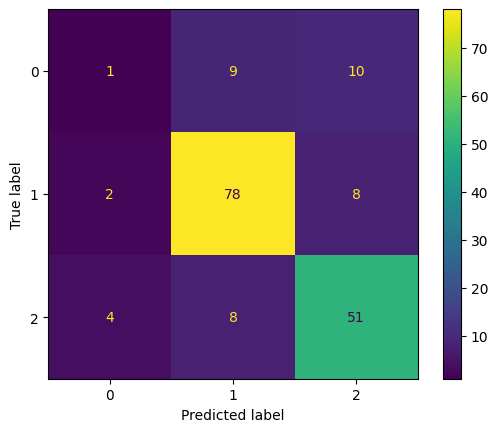

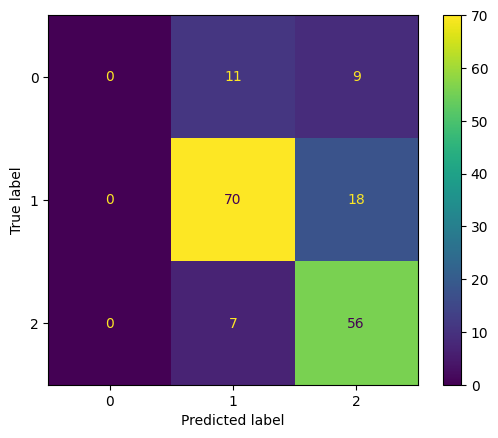

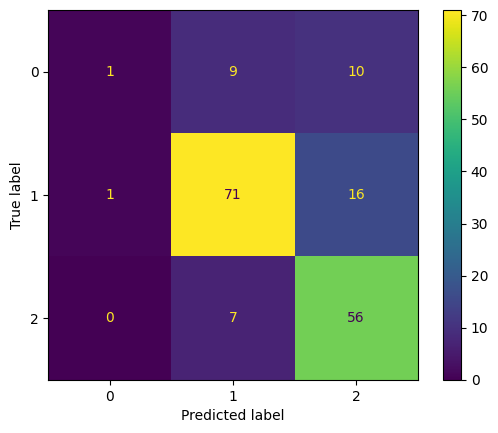

In [25]:
from e2ml.evaluation import accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate on test data
y_preds = []
for idx, clf in enumerate(models):
    y_pred = clf.predict(X_test)
    y_preds.append(y_pred)

    # Print accuracy
    print(f'{model_names[idx]} accuracy: {accuracy(y_true=y_test, y_pred=y_pred)}')

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test, y_pred=y_pred))
    disp.plot()
    disp.figure_.savefig(f'../../results/plots/batch2/{model_names[idx]}_confusion_matrix.jpg')
